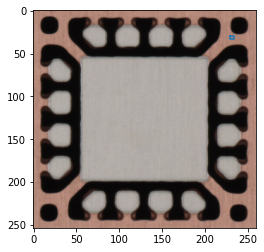

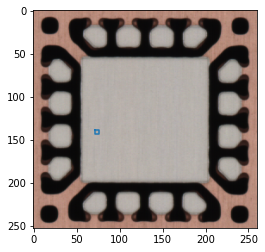

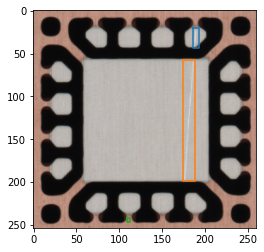

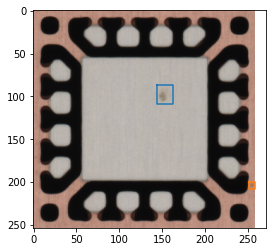

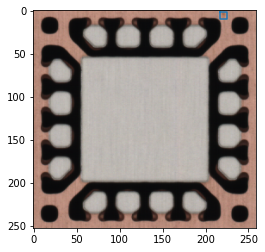

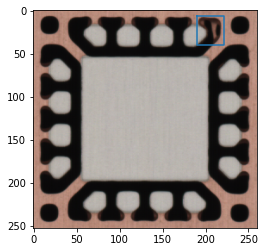

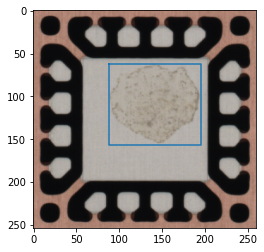

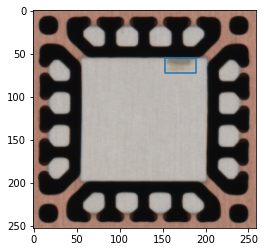

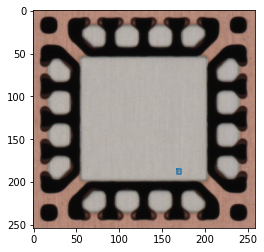

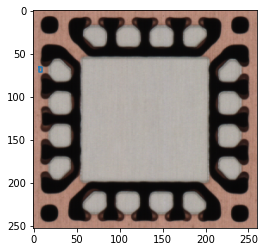

In [1]:
from common_lib import DataManager
from common_lib import decode_labelme_shape
import os.path as osp
import cv2
import glob
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

image_data_root = "/git/dataSet/raw/unsupervised-learning/kangqiang/"

data1 = DataManager.from_json('assets/data/2021-03-05/train-aug.json')
data2 = DataManager.from_json('assets/data/2021-03-05/val.json')
data3 = DataManager.from_json('assets/data/2021-03-05/test.json')
data = data1.merge(data2).merge(data3)
data = data.filter(lambda rec: len(rec['instances']) > 0)
num=10
for rec in data:
    """if '00717DFN-002A-2149-222_0_0_5072_18230' not in rec['info']['image_path']:
        continue"""
    if num>0:
        num-=1
        img = cv2.imread(osp.join(image_data_root, rec['info']['image_path']))[...,::-1]
        assert img is not None, rec

        plt.imshow(img)

        for inst in rec['instances']:
            shapes = np.array(decode_labelme_shape(inst['points']))
            x1,y1,x2,y2 = shapes[:,0].min(), shapes[:,1].min(), shapes[:,0].max(), shapes[:,1].max()
            plt.plot([x1,x1,x2,x2,x1], [y1, y2, y2, y1, y1])
        plt.show()